In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-data/train.csv
/kaggle/input/loan-data/test.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
data = pd.read_csv('../input/loan-data/train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.drop(['Loan_ID'], axis=1,inplace = True)

In [6]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
## Fill missing values with front and back fill method
data.fillna(method='ffill',inplace=True)
data.fillna(method='bfill',inplace=True)
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

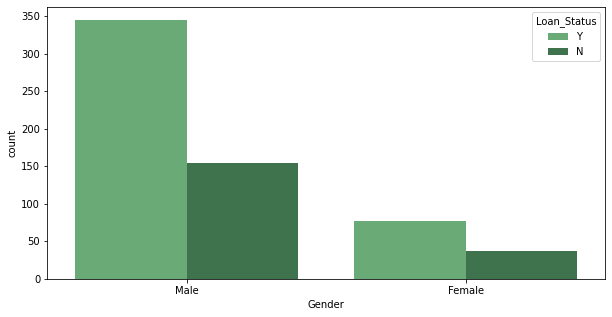

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender',data=data,hue='Loan_Status',palette='Greens_d')
plt.show()

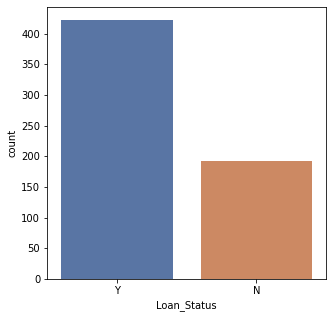

In [9]:
plt.figure(figsize=(5,5))
sns.countplot(x='Loan_Status',data=data,palette='deep')
plt.show()

<Figure size 720x360 with 0 Axes>

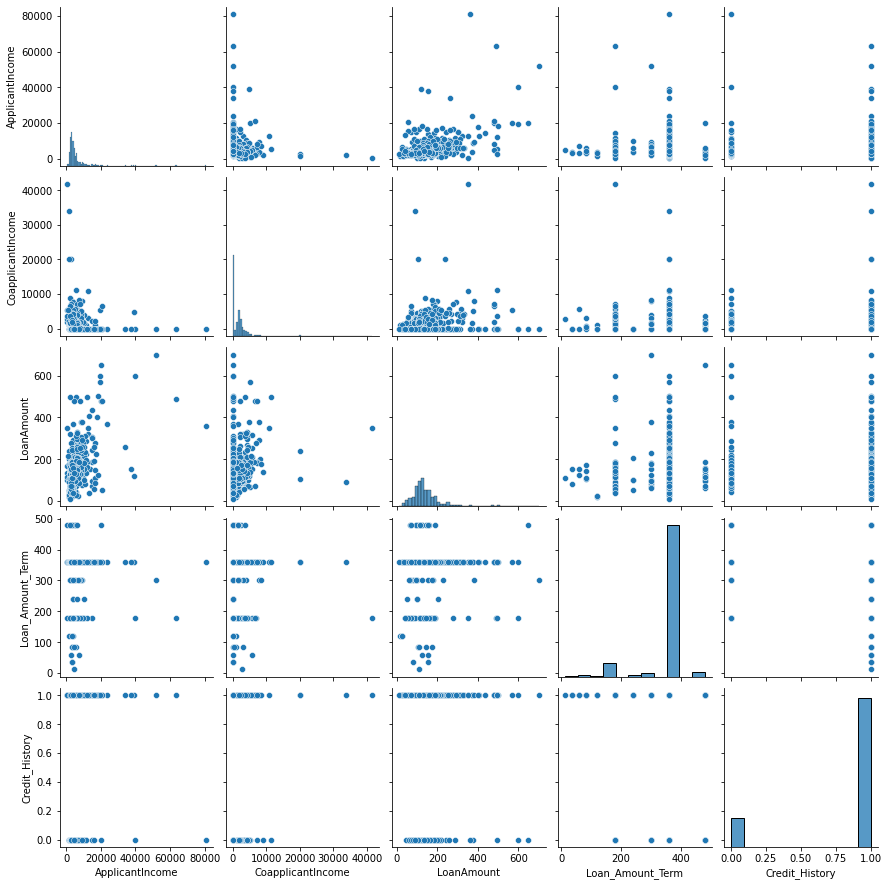

In [10]:
plt.figure(figsize=(10,5))
sns.pairplot(data)
plt.show()

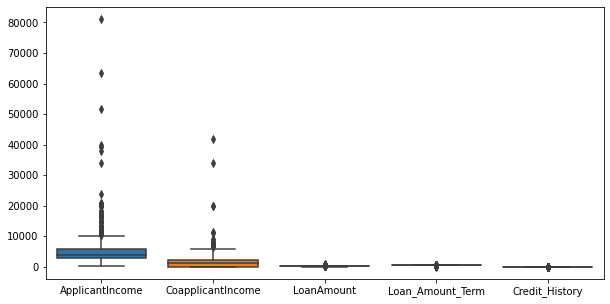

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data)
plt.show()

In [12]:
scaler = MinMaxScaler()

# data.drop(['Loan_ID'], axis=1,inplace = True)
numerical = data.select_dtypes(exclude=['object'])
data[numerical.columns] = scaler.fit_transform(numerical)

data = pd.get_dummies(data,drop_first = True)
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.070489,0.000000,0.172214,0.74359,1.0,1,0,0,0,0,0,0,0,1,1
1,0.054830,0.036192,0.172214,0.74359,1.0,1,1,1,0,0,0,0,0,0,0
2,0.035250,0.000000,0.082489,0.74359,1.0,1,1,0,0,0,0,1,0,1,1
3,0.030093,0.056592,0.160637,0.74359,1.0,1,1,0,0,0,1,0,0,1,1
4,0.072356,0.000000,0.191027,0.74359,1.0,1,0,0,0,0,0,0,0,1,1


In [13]:
y = data['Loan_Status_Y']
X = data.drop(['Loan_Status_Y'], axis=1)

xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=3)
# model = DecisionTreeClassifier()
model = model.fit(xtrain, ytrain)

[Text(0.4583333333333333, 0.875, 'Credit_History <= 0.5\ngini = 0.438\nsamples = 491\nvalue = [159, 332]\nclass = 0'),
 Text(0.25, 0.625, 'LoanAmount <= 0.617\ngini = 0.232\nsamples = 82\nvalue = [71, 11]\nclass = 1'),
 Text(0.16666666666666666, 0.375, 'ApplicantIncome <= 0.05\ngini = 0.202\nsamples = 79\nvalue = [70, 9]\nclass = 1'),
 Text(0.08333333333333333, 0.125, 'gini = 0.089\nsamples = 43\nvalue = [41, 2]\nclass = 1'),
 Text(0.25, 0.125, 'gini = 0.313\nsamples = 36\nvalue = [29, 7]\nclass = 1'),
 Text(0.3333333333333333, 0.375, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = 0'),
 Text(0.6666666666666666, 0.625, 'LoanAmount <= 0.216\ngini = 0.338\nsamples = 409\nvalue = [88, 321]\nclass = 0'),
 Text(0.5, 0.375, 'CoapplicantIncome <= 0.018\ngini = 0.29\nsamples = 290\nvalue = [51, 239]\nclass = 0'),
 Text(0.4166666666666667, 0.125, 'gini = 0.37\nsamples = 147\nvalue = [36, 111]\nclass = 0'),
 Text(0.5833333333333334, 0.125, 'gini = 0.188\nsamples = 143\nvalue = [15, 128]\ncla

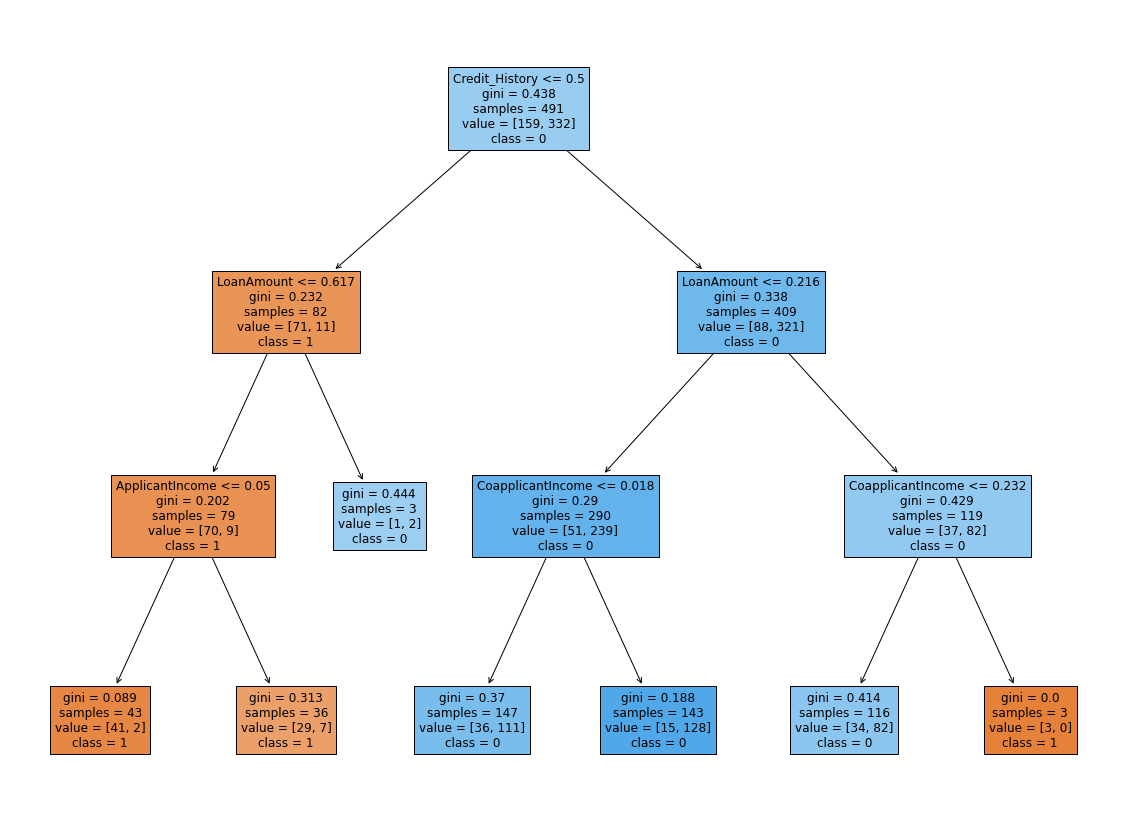

In [15]:
dt_feature_names = list(xtrain.columns)
dt_target_names = [str(s) for s in ytrain.unique()]
plt.figure(figsize = (20,15))
plot_tree(model,feature_names = dt_feature_names, class_names = dt_target_names, filled = True)

In [16]:
y_pred_test = model.predict(xtest)
print(confusion_matrix(ytest, y_pred_test))
print(classification_report(ytest, y_pred_test))

[[16 17]
 [ 3 87]]
              precision    recall  f1-score   support

           0       0.84      0.48      0.62        33
           1       0.84      0.97      0.90        90

    accuracy                           0.84       123
   macro avg       0.84      0.73      0.76       123
weighted avg       0.84      0.84      0.82       123



In [17]:
y_pred_train = model.predict(xtrain)
print(confusion_matrix(ytrain, y_pred_train))
print(classification_report(ytrain, y_pred_train))

[[ 73  86]
 [  9 323]]
              precision    recall  f1-score   support

           0       0.89      0.46      0.61       159
           1       0.79      0.97      0.87       332

    accuracy                           0.81       491
   macro avg       0.84      0.72      0.74       491
weighted avg       0.82      0.81      0.79       491

